In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.image import extract_patches_2d

In [2]:
def normalize(tensor):
    tensor = tensor.copy().astype(np.float)
    tensor -= np.min(tensor)
    tensor /= np.max(tensor)
    return tensor

In [3]:
cpg_folder = "../../XRM/CPG200_PS239k_10min/"

In [4]:
tensor = np.load(os.path.join(cpg_folder, "cpg_rotated.npy"))

In [5]:
tensor = normalize(tensor)

In [6]:
image = tensor[300,200:800,:]

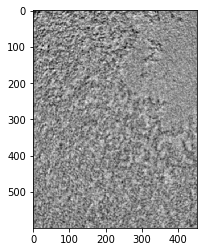

In [7]:
plt.imshow(image, cmap="gray")

In [8]:
#patches = extract_patches_2d(image, (50,50))

In [25]:
import keras
model = keras.models.load_model("texture_cnn_2_epochs.h5")

In [26]:
patch_width, patch_height = [50,50]
patches = extract_patches_2d(image, (patch_height, patch_width))

In [28]:
patches = np.expand_dims(patches, -1)

In [29]:
patches.shape

(222053, 50, 50, 1)

In [35]:
res = model.predict(patches)

In [36]:
#shape = [image.shape[0]-49,image.shape[1]-49, 50, 50]
#shape = [image.shape[0]-(patch_height-1),image.shape[1]-(patch_width-1), patch_height, patch_width]

In [40]:
shape = [image.shape[0]-(patch_height-1),image.shape[1]-(patch_width-1)]

In [63]:
res1 = np.fliplr(np.reshape(res, shape))

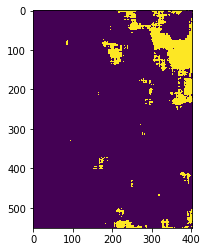

In [79]:
plt.imshow(res1>.5)